# **Customer Churn Analysis in Telecom**

**Agenda**
1. Business Problem 05
2. Solution Approach
3. EDA 
4. Missing Value analysis
5. Chi-Square Test
  * Variable importance in Random Forest
6. Train and Test Split
7. Model Fitting
8. Model Validation 
    * Accuracy
    * Sensitivity
    * Specificity
    * ROC Curve
9. Finding Optimal Cut-off
10. Classification Report

## **Business Problem - Background**

In the telecom sector, a massive quantity of information is being generated on a day by day foundation because of a sizable customer base. Decision makers and
commercial enterprise analysts emphasized that achieving new clients is dearer than maintaining the present ones. Business analysts and purchaser dating management analyzers want to recognize the reason behind churning clients.

## **Solution Approach**

- Churn prediction model that uses classification, as well as, techniques to identify the churn customers and provides the factors behind the churning of customers in the telecom sector.

- We will train our machine learning model using random forest to
learn the patterns in the churn data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **2. What is Exploratory Data Analysis (EDA)?**

It is the process of performing a prior investigation on the data where it is
collected, analysed and presented in an understandable way.




In [2]:
# Step 1: Import dataset
data = pd.read_csv('customer_churn.csv')

In [3]:
# Step 2: Displaying first 20 rows of dataset with head() function
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Step 3: Checking all the statistical data.
# describe() helps us to check for mean, std, quartiles, minimum and maximum values in our dataset.
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* Visualization is the best way to present the data in a most understandable way.
* Visualization can be done with different types of plots like bar, line, box, scatter plot and so on.

In [5]:
# Step 4: Check for datatypes of each column
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.shape

(7043, 21)

## **3. What is Missing Data Analysis?**

It is the process where the missing value pattern is described and replaced with values using certain regression.

Check for the missing value by the use of ***isna()*** function.

In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [8]:
data[data['TotalCharges']==' ']
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [9]:
data[np.isnan(data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
Let's see if there are any other 0 values in the tenure column.

In [10]:
data[data['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no additional missing values in the Tenure column.

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [11]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)
data[data['tenure'] == 0].index

Int64Index([], dtype='int64')

To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [12]:
data.fillna(data["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [13]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Missing Data Analysis - Code Traverse & Imputation **

If data having na or null data then remove that rows
> df.dropna(inplace=True)

> df.isna().sum()

**Missing Data Imputation**

* Missing values for quantitative or numeric data is replaced
by mean or median of the column.

* Missing values for qualitative data is replaced by mode of
the data.

**Mean Vs Median - Quick Look**
Let us consider an example, consider below given ages
where we have to predict the missing age with mean and
median.
```
SI    Num Age ( years )

1     18
2     20
3     15
4     ?
5     70
```
Mean <--> 31 years

Median <--> 18

If we see the above example closely we can see that median gives us a more realistic value. Due to this nature of median we prefer median over mean.

##5. What is Chi Square Test?
A chi-square test is used to see if observed findings match predicted outcomes and to eliminate the possibility that observations are random.

It is used to demonstrate if two category variables have
a link with each other.

**Dimentionality Reduction**

n Dimention --> 3 Dimension --> 2 Dimension --> 1 Dimention


### **Chi Square Test - Study**

- A p-value less than or equal to your significance
threshold 0.05 in a Chi-square test shows that there is
enough evidence to determine that the observed
distribution is not the same as the expected
distribution.

- This means that the independent categorical
variable is having a strong correlation with
dependent categorical variable

- You can deduce that the
categorical variables have a
relationship.

https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95

**Chi Square Test - Computing**

Step 8: Calculating the p-value in order to decide whether correlation between target variable and independent variable is strong or not. 

if p<0.05 ,variable importance is high.

In [14]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [15]:
# Chi Square Test for Independence for all object fields
col_list = list(data.columns)
col_list.remove('Churn')
df = pd.DataFrame(columns = ['Feature','P-value'])

for col in col_list:
  if data[[col]][col].dtypes == 'object':

    # chi sq test for Independence
    dataset_table = pd.crosstab(data[col], data['Churn'])

    # Observed Values
    Observed_Values = dataset_table.values
    #print("Observed_Values : ",Observed_Values)

    val = chi2_contingency(dataset_table)

    Expected_Values = val[3]

    chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
    chi_square_statistic = chi_square[0]+chi_square[1]

    no_of_row = len(dataset_table.iloc[0:2,0])
    no_of_columns=len(dataset_table.iloc[0,0:2])
    ddof = (no_of_row-1)*(no_of_columns-1)
    #print("degree of freedom: ",ddof)
    alpha = 0.05

    critical_value = chi2.ppf(q=1-alpha, df=ddof)

    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=ddof)
    df = df.append({'Feature':col, 'P-value': p_value}, ignore_index=True)

df

,Feature,P-value
0,customerID,0.000000
1,gender,0.473665
2,Partner,0.000000
3,Dependents,0.000000
4,PhoneService,0.326886
5,MultipleLines,0.000787
6,InternetService,0.000000
7,OnlineSecurity,0.000000
8,OnlineBackup,0.000000
9,DeviceProtection,0.000000


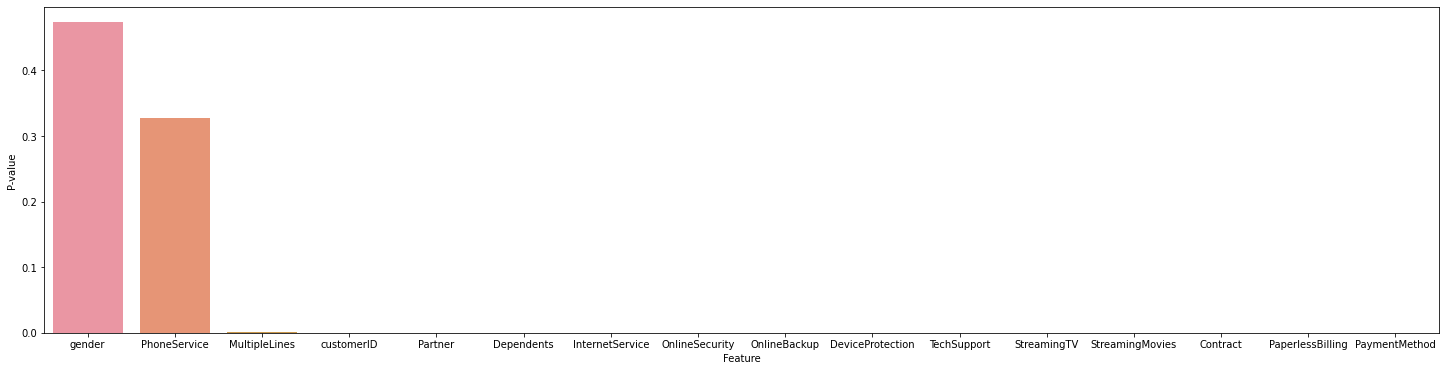

In [31]:
import seaborn as sns
plt.figure(figsize=(25,6))
#make barplot and sort bars
sns.barplot(x='Feature', y='P-value', data = df, order = df.sort_values('P-value', ascending=False).Feature)

**5.2 Variable Importance**

- Variable importance is checking which variable is having more
predictive power.

- High-importance variables are outcome drivers, and their
values have a big impact on the final numbers.

Checking for variable importance and visualizing it.


## **7. Data Preprocessing**

In [17]:
from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [18]:
chun_data = data.apply(lambda x: object_to_int(x))
chun_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [19]:
chun_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int64  
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


## **6. What is Train and Test of Data ?**
- It is the process of splitting data into train and test sections so we can train the model with the train data and test if our model is working fine with test data
- Training and testing of model helps us to gauge the performance of our model
- We always divide in a way where train will have more data and test will have comparatively less data.

In [20]:
x = chun_data.iloc[:,:-1].values
y = chun_data.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [22]:
x_train.shape

(5625, 20)

## **7. What is Model Fitting ?**

The process of training the model on the required data is
called model training.

We also refer to it as model fitting.

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators=500,random_state=0)
classifier1.fit(x_train,y_train)
y_pred1=classifier1.predict(x_test)

In [26]:
'''from sklearn.datasets import make_classification
importance = classifier1.feature_importances_

importance = pd.Series(importance)
importance'''

0     0.128965
1     0.022939
2     0.019053
3     0.018585
4     0.016837
5     0.139745
6     0.004805
7     0.020851
8     0.026378
9     0.041669
10    0.023531
11    0.020175
12    0.037465
13    0.014596
14    0.015759
15    0.075990
16    0.022757
17    0.044476
18    0.147659
19    0.157763
dtype: float64

In [ ]:
''''import seaborn as sns
plt.figure(figsize=(25,6))
#make barplot and sort bars
sns.barplot(x='Feature', y='P-value', data = df, order = df.sort_values('P-value', ascending=False).Feature)''''

## **8. What is Model Validation ?**
- The process of testing the model with the test data after training the model is called model validation.
- This gives us the description on the model performance.
- This gives us the insites on the model performance.
- This is also called model testing.

Shown are the steps for model validation.


Accuracy --. Security --> Specificity --> ROC Curve

In [34]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [32]:
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [33]:
y_pred1.shape

(1407,)

In [36]:
c1 = confusion_matrix(y_test, y_pred1)
c1

array([[935, 103],
       [189, 180]])

In [37]:
a1 = accuracy_score(y_test, y_pred1)
a1

0.7924662402274343

### **8.1 What is Accuracy?**
- The process of checking how accurate the model is during model validation is called as accuracy.

- High precision and is required to get high accuracy of the model.
```
Formula:

        TP + TN
  ___________________
   TP + TN + FP + FN
```

### **8.2 What is Sensitivity?**
- The process of determining how the output varies in response to changes in the input is known as sensitivity.
- It could provide insight into the predictability of a model.
- It is used to check the model’s ability to predict true positive data.

```
Formula:

            True Positive
  ________________________________
   True Positive + False Negative
```


In [38]:
sen1 = c1[0,0]/ (c1[0,0] + c1[0,1])
sen1

0.9007707129094412

### **8.3 What is Specificity?**
- The process of predicting the negative value correctly is called specificity.
- It is used to predit the ability of the model that whether or not an observation belongs to a specific category.
- It's used to see how the model can predict true negative data.

```
Formula:

            True Negative
  ________________________________
   True Negative + False Positive
```

In [39]:
sep1 = c1[1,1]/ (c1[1,1] + c1[1, 0])
sep1

0.4878048780487805

### **8.4 What is ROC Curve?**
- The ROC curve depicts the sensitivity-specificity relationship.
- We construct true positive rate against the false positive rate to get a ROC Curve.
- The better performance in ROC curve is seen when the curve is closer to top-left corner and bad performance is seen when the curve is more toward 45 degrees.

`ROC Curve shows us the relationship between true positive and true negative.`



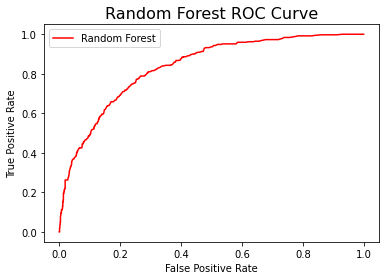

In [47]:
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores
test_pred_prod = classifier1.predict_proba(x_test)
auc = roc_curve(np.array(y_test), test_pred_prod[:, 1])

# summarize scores
#print('Logistic: ROC AUC=%.3f' % (auc))

# calculate roc curves
fpr, tpr, _ = roc_curve(np.array(y_test), test_pred_prod[:, 1])#roc_curve(np.array(y_test), test_pred_prod[:, 1])

# plot the roc curves
pyplot.plot(fpr, tpr,  label='Random Forest',color = "r")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Random Forest ROC Curve',fontsize=16)
pyplot.legend()
pyplot.show()